In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#Load Analytical Base Table from feature engineering:
df = pd.read_csv('Recsys_2015.csv', low_memory = False, delimiter =',')
df.head()

,Unnamed: 0,SessionID,item_cnt_in_ses,click_weekday,ave_item_price,click_timeofday,click_payrollday,dwell_time,cnt_pop_item,ave_cheap_cat_score,cnt_most_click_cat,cnt_most_click_item,click_rate,cnt_cheap_item,first_click_pop_item,last_click_pop_item,buy_or_not
0,0,9194351,5,0,1534.777778,2,1,320.0,5.0,3.0,5,5,64.000000,1.0,1,1,0.0
1,1,9194429,2,0,1412.500000,2,1,60.0,2.0,3.0,2,2,30.000000,0.0,1,1,0.0
2,2,9194513,3,0,1470.500000,2,1,883.0,3.0,3.0,3,3,294.333333,2.0,1,1,0.0
3,3,9194692,1,0,3664.000000,4,1,0.0,1.0,3.0,1,1,0.000000,0.0,1,1,0.0
4,4,9194824,1,0,9424.000000,1,1,0.0,0.0,3.0,0,1,0.000000,0.0,0,0,0.0


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,SessionID,item_cnt_in_ses,click_weekday,ave_item_price,click_timeofday,click_payrollday,dwell_time,cnt_pop_item,ave_cheap_cat_score,cnt_most_click_cat,cnt_most_click_item,click_rate,cnt_cheap_item,first_click_pop_item,last_click_pop_item,buy_or_not
0,9194351,5,0,1534.777778,2,1,320.0,5.0,3.0,5,5,64.000000,1.0,1,1,0.0
1,9194429,2,0,1412.500000,2,1,60.0,2.0,3.0,2,2,30.000000,0.0,1,1,0.0
2,9194513,3,0,1470.500000,2,1,883.0,3.0,3.0,3,3,294.333333,2.0,1,1,0.0
3,9194692,1,0,3664.000000,4,1,0.0,1.0,3.0,1,1,0.000000,0.0,1,1,0.0
4,9194824,1,0,9424.000000,1,1,0.0,0.0,3.0,0,1,0.000000,0.0,0,0,0.0


In [5]:
# missing data imputation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100086 entries, 0 to 100085
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SessionID             100086 non-null  int64  
 1   item_cnt_in_ses       100086 non-null  int64  
 2   click_weekday         100086 non-null  int64  
 3   ave_item_price        96666 non-null   float64
 4   click_timeofday       100086 non-null  int64  
 5   click_payrollday      100086 non-null  int64  
 6   dwell_time            100086 non-null  float64
 7   cnt_pop_item          96666 non-null   float64
 8   ave_cheap_cat_score   100078 non-null  float64
 9   cnt_most_click_cat    100086 non-null  int64  
 10  cnt_most_click_item   100086 non-null  int64  
 11  click_rate            100086 non-null  float64
 12  cnt_cheap_item        96666 non-null   float64
 13  first_click_pop_item  100086 non-null  int64  
 14  last_click_pop_item   100086 non-null  int64  
 15  

In [6]:
# missing data imputation
imputer = SimpleImputer(strategy = "median")

imputer.fit(df)
data = imputer.transform(df)

data = pd.DataFrame(data, columns = df.columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100086 entries, 0 to 100085
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SessionID             100086 non-null  float64
 1   item_cnt_in_ses       100086 non-null  float64
 2   click_weekday         100086 non-null  float64
 3   ave_item_price        100086 non-null  float64
 4   click_timeofday       100086 non-null  float64
 5   click_payrollday      100086 non-null  float64
 6   dwell_time            100086 non-null  float64
 7   cnt_pop_item          100086 non-null  float64
 8   ave_cheap_cat_score   100086 non-null  float64
 9   cnt_most_click_cat    100086 non-null  float64
 10  cnt_most_click_item   100086 non-null  float64
 11  click_rate            100086 non-null  float64
 12  cnt_cheap_item        100086 non-null  float64
 13  first_click_pop_item  100086 non-null  float64
 14  last_click_pop_item   100086 non-null  float64
 15  

In [7]:
data.describe()

,SessionID,item_cnt_in_ses,click_weekday,ave_item_price,click_timeofday,click_payrollday,dwell_time,cnt_pop_item,ave_cheap_cat_score,cnt_most_click_cat,cnt_most_click_item,click_rate,cnt_cheap_item,first_click_pop_item,last_click_pop_item,buy_or_not
count,1.000860e+05,100086.000000,100086.000000,100086.000000,100086.000000,100086.000000,100086.000000,100086.000000,100086.000000,100086.000000,100086.000000,100086.000000,100086.000000,100086.000000,100086.000000,100086.000000
mean,1.059989e+07,5.054213,3.115211,5054.498684,2.791210,0.120726,631.941141,3.622215,2.999697,3.269568,3.275193,112.505730,1.644436,0.732060,0.688398,0.500090
std,5.802499e+05,5.982175,2.257741,10641.375186,0.867939,0.325810,1026.484617,4.362695,0.546416,4.365992,4.267795,176.387640,3.567598,0.442888,0.463150,0.500002
min,9.194351e+06,1.000000,0.000000,26.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.013127e+07,2.000000,1.000000,1009.510417,2.000000,0.000000,49.000000,1.000000,3.000000,1.000000,1.000000,20.500000,0.000000,0.000000,0.000000,0.000000
50%,1.063608e+07,3.000000,3.000000,1622.000000,3.000000,0.000000,244.000000,2.000000,3.000000,2.000000,2.000000,60.000000,0.000000,1.000000,1.000000,1.000000
75%,1.108916e+07,6.000000,5.000000,4344.500000,3.000000,0.000000,759.000000,5.000000,3.000000,4.000000,4.000000,126.333333,2.000000,1.000000,1.000000,1.000000
max,1.156211e+07,197.000000,6.000000,208288.000000,4.000000,1.000000,29262.000000,105.000000,4.000000,143.000000,112.000000,2245.333333,78.000000,1.000000,1.000000,1.000000


In [8]:
corr_matrix = data.corr()
corr_matrix["buy_or_not"].sort_values(ascending=False)

buy_or_not              1.000000
cnt_pop_item            0.311884
item_cnt_in_ses         0.299172
cnt_most_click_item     0.296612
dwell_time              0.288196
cnt_most_click_cat      0.257401
cnt_cheap_item          0.210218
click_rate              0.170981
first_click_pop_item    0.140859
last_click_pop_item     0.112321
click_weekday           0.073431
SessionID               0.023526
click_timeofday        -0.012861
click_payrollday       -0.022361
ave_item_price         -0.047566
ave_cheap_cat_score    -0.075489
Name: buy_or_not, dtype: float64

In [9]:
# Split train and test datasets
y = data['buy_or_not'].values
X = data.drop(['buy_or_not'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### logistic regression

In [10]:
# Create the classifier: log_reg
log_reg = LogisticRegression(random_state = 42)

# Fit the classifier to the train data
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [11]:
# Predict the labels of the test dataset: y_test_pred
y_test_pred = log_reg.predict(X_test)

In [12]:
# the performance of the model on train dataset

# Predict the labels of the train set: y_train_pred
y_train_pred = log_reg.predict(X_train)

# Compute and print the confusion matrix and classification report
print(f'confusion matrix\n {confusion_matrix(y_train, y_train_pred)}\n')
print(f'classification report\n {classification_report(y_train, y_train_pred)}')

confusion matrix
 [[33455  6546]
 [19999 20068]]

classification report
               precision    recall  f1-score   support

         0.0       0.63      0.84      0.72     40001
         1.0       0.75      0.50      0.60     40067

    accuracy                           0.67     80068
   macro avg       0.69      0.67      0.66     80068
weighted avg       0.69      0.67      0.66     80068



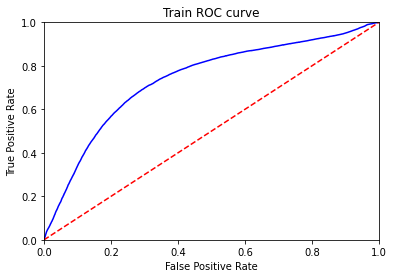

In [13]:
# Compute predicted probabilities: y_train_pred_prob
y_train_pred_prob = log_reg.predict_proba(X_train)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_prob)
roc_auc = metrics.auc(fpr,tpr)

# Plot ROC curve
plt.title('Train ROC curve')
plt.plot(fpr,tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
# auc score of the train dataset
auc(fpr, tpr)

0.7369274481043856

In [18]:
# the performance of the model on test dataset

# Predict the labels of the test set: y_test_pred
y_test_pred = log_reg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(f'confusion matrix\n {confusion_matrix(y_test, y_test_pred)}\n')
print(f'classification report\n {classification_report(y_test, y_test_pred)}')

confusion matrix
 [[8396 1637]
 [5075 4910]]

classification report
               precision    recall  f1-score   support

         0.0       0.62      0.84      0.71     10033
         1.0       0.75      0.49      0.59      9985

    accuracy                           0.66     20018
   macro avg       0.69      0.66      0.65     20018
weighted avg       0.69      0.66      0.65     20018



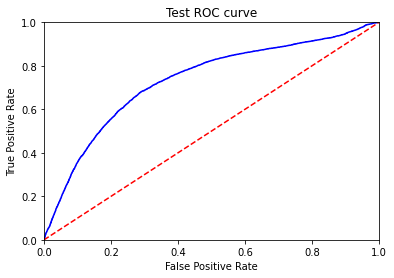

In [19]:
# Compute predicted probabilities: y_test_pred_prob
y_test_pred_prob = log_reg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
roc_auc = metrics.auc(fpr,tpr)

# Plot ROC curve
plt.title('Test ROC curve')
plt.plot(fpr,tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
# auc score of the test dataset
auc(fpr, tpr)

0.7325293931128928

### random forest

In [21]:
# convert categorical features to category datatype
data['click_weekday'] = data['click_weekday'].astype('category')
data['click_payrollday'] = data['click_payrollday'].astype('category')
data['first_click_pop_item'] = data['first_click_pop_item'].astype('category')
data['last_click_pop_item'] = data['last_click_pop_item'].astype('category')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100086 entries, 0 to 100085
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   SessionID             100086 non-null  float64 
 1   item_cnt_in_ses       100086 non-null  float64 
 2   click_weekday         100086 non-null  category
 3   ave_item_price        100086 non-null  float64 
 4   click_timeofday       100086 non-null  float64 
 5   click_payrollday      100086 non-null  category
 6   dwell_time            100086 non-null  float64 
 7   cnt_pop_item          100086 non-null  float64 
 8   ave_cheap_cat_score   100086 non-null  float64 
 9   cnt_most_click_cat    100086 non-null  float64 
 10  cnt_most_click_item   100086 non-null  float64 
 11  click_rate            100086 non-null  float64 
 12  cnt_cheap_item        100086 non-null  float64 
 13  first_click_pop_item  100086 non-null  category
 14  last_click_pop_item   100086 non-nul

In [23]:
y = data['buy_or_not'].values
X = data.drop(['buy_or_not'], axis=1).values

# Split train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Create the classifier: forest
forest = RandomForestClassifier(max_depth = 2, random_state = 0)

# Fit the classifier to the train dataset
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [25]:
print(forest.feature_importances_)
# Features 2, 7, 8, 12, which are number of items, dwelling time, popular items clicked and time spent on each item, 
# are more impartant than other features. This is similar to what we found by data correlation matrix earlier.

[2.02556632e-04 1.83993339e-01 1.05146241e-03 9.63701657e-03
 2.93714748e-04 0.00000000e+00 2.89046718e-01 1.51516664e-01
 8.49830022e-03 4.44842408e-02 7.24332117e-02 1.94259669e-01
 2.64047472e-02 6.55572661e-03 1.16226331e-02]


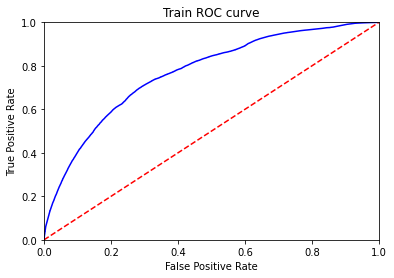

In [26]:
# Compute predicted probabilities: y_train_pred_prob
y_train_pred_prob = forest.predict_proba(X_train)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_prob)

# Plot ROC curve
plt.title('Train ROC curve')
plt.plot(fpr,tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [27]:
# auc score of the train dataset
auc(fpr, tpr)

0.7688215418095217

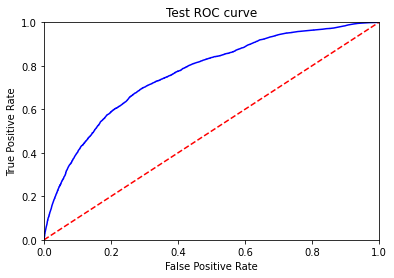

In [28]:
# Compute predicted probabilities: y_test_pred_prob
y_test_pred_prob = forest.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)

# Plot ROC curve
plt.title('Test ROC curve')
plt.plot(fpr,tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
# auc score of the test dataset
auc(fpr, tpr)

0.7643351851259397